In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
Fraud_Check= pd.read_csv("D:/Data Secience/Assignment/Decision Trees/Fraud_check.csv")

In [3]:
Fraud_Check.head ()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


 ## Exploratory Data Analysis

In [4]:
# Data Structure
Fraud_Check.shape

(600, 6)

In [5]:
# Data Type
Fraud_Check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
Fraud_Check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
# Duplicates
Fraud_Check[Fraud_Check.duplicated()].shape

(0, 6)

In [8]:
fraud=Fraud_Check.copy()

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
# Rename the column
fraud=fraud.rename({'Marital.Status':'Marital','City.Population':'Population','Work.Experience':'Experience'},axis=1)

<AxesSubplot:>

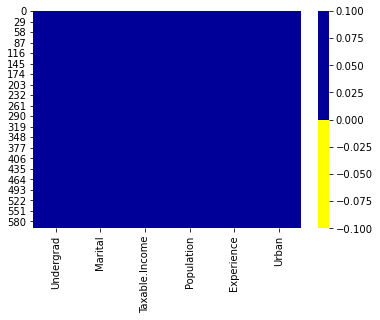

In [11]:
# Missing values and Imputation
import seaborn as sns
cols=fraud.columns
colours=['#ffff00','#000099']
sns.heatmap(fraud[cols].isnull(),
            cmap=sns.color_palette(colours))

In [12]:
fraud.isnull().sum()

Undergrad         0
Marital           0
Taxable.Income    0
Population        0
Experience        0
Urban             0
dtype: int64

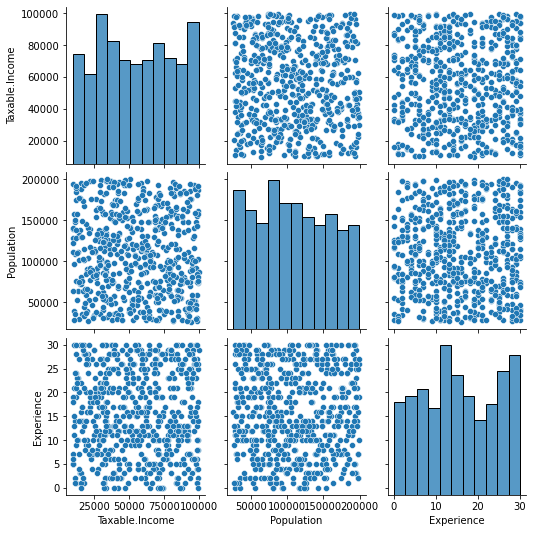

In [13]:
#Scatter plot and Correlation Analysis
sns.pairplot(fraud)

In [14]:
fraud.corr()

,Taxable.Income,Population,Experience
Taxable.Income,1.000000,-0.064387,-0.001818
Population,-0.064387,1.000000,0.013135
Experience,-0.001818,0.013135,1.000000


In [15]:
import sweetviz as sv
sweet_report =sv.analyze(fraud)
sweet_report.show_html('Fraud Check_report.html')


Report Fraud Check_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
fraud_check=fraud.copy()

 ## Label_Encoder

In [17]:
label_encoder = preprocessing.LabelEncoder()
fraud_check['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud_check['Marital']= label_encoder.fit_transform(fraud['Marital'])
fraud_check['Urban']= label_encoder.fit_transform(fraud['Urban'])

In [18]:
fraud_check.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [19]:
 # Converting the Taxable Income variable to bucketing
fraud_check["Income"]="<=30000"
fraud_check.loc[fraud_check["Taxable.Income"]>=30000,"Income"]="1" # Good =1
fraud_check.loc[fraud_check["Taxable.Income"]<=30000,"Income"]="0" # Risky=0


In [20]:
fraud_check.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban,Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [21]:
fraud_check['Income']= label_encoder.fit_transform(fraud_check['Income'])

In [22]:
fraud_check.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban,Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


# Normalization Function

In [50]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
fraud_check=norm_func(fraud_check.iloc[:,0:])

In [25]:
fraud_check.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban,Income
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,1.0


In [26]:
fraud1=fraud_check.copy()

In [27]:
fraud1=fraud1.drop('Taxable.Income', axis=1)

In [28]:
fraud1.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0.0,1.0,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.010081,0.933333,0.0,1.0


In [29]:
fraud1.dtypes

Undergrad     float64
Marital       float64
Population    float64
Experience    float64
Urban         float64
Income        float64
dtype: object

In [30]:
fraud2=fraud1.astype({"Undergrad":'int',"Marital":'int',"Urban":'int',"Income":'int'})

In [31]:
fraud2.dtypes

Undergrad       int32
Marital         int32
Population    float64
Experience    float64
Urban           int32
Income          int32
dtype: object

In [32]:
fraud2.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,1,0.139472,0.333333,1,1
1,1,0,0.622394,0.600000,1,1
2,0,0,0.772568,1.000000,1,1
3,1,1,0.962563,0.500000,1,1
4,0,0,0.010081,0.933333,0,1


In [33]:
x=fraud2.iloc[:,0:6]
y=fraud2['Income']

In [34]:
x

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,1,0.139472,0.333333,1,1
1,1,0,0.622394,0.600000,1,1
2,0,0,0.772568,1.000000,1,1
3,1,1,0.962563,0.500000,1,1
4,0,0,0.010081,0.933333,0,1
...,...,...,...,...,...,...
595,1,0,0.078811,0.233333,1,1
596,1,0,0.170058,0.066667,1,1
597,0,0,0.737240,0.000000,1,1
598,1,0,0.886810,0.566667,0,1


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Income, Length: 600, dtype: int32

In [36]:
fraud2['Income'].unique()

array([1, 0])

In [37]:
fraud2.Income.value_counts()

1    476
0    124
Name: Income, dtype: int64

Text(0, 0.5, 'Frequency')

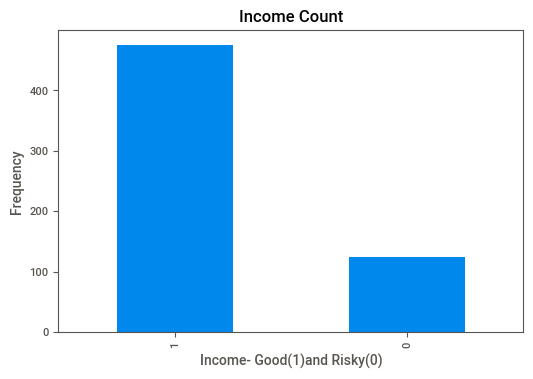

In [38]:
fraud2=pd.DataFrame(x)
fraud2['Income']=y
fraud2.Income.value_counts().plot(kind='bar', title='Income Count');
plt.xlabel("Income- Good(1)and Risky(0)")
plt.ylabel("Frequency")

In [39]:
good=fraud2[fraud2['Income']==1]
risky=fraud2[fraud2['Income']==0]

In [40]:
print(good.shape, risky.shape)

(476, 6) (124, 6)


# Splitting data into Training and Testing Dataset

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=40)

 ## Building Decision Tree Clasifier using Entropy Criteria

In [42]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

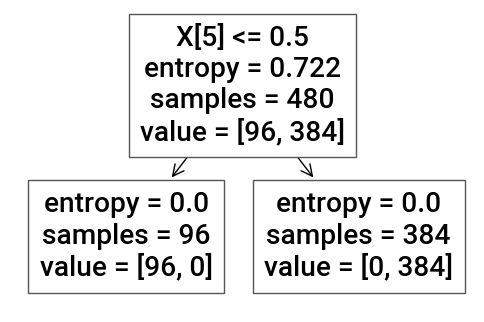

In [43]:
# Plot the Decision Tree
tree.plot_tree(model);

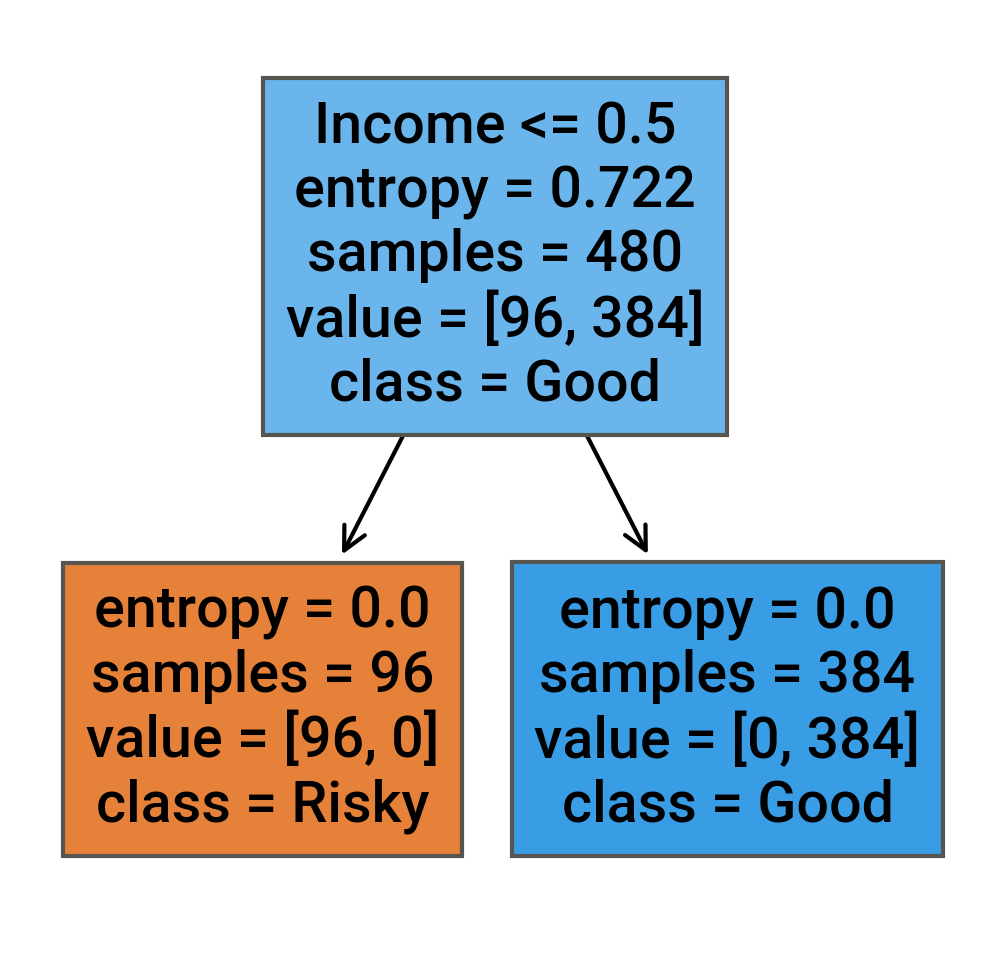

In [44]:
fn=['Undergrad','Marital','Population','Experience','Urban','Income']
cn=['Risky','Good']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names= fn,
               class_names=cn,
               filled=True);

 ## We ending with pure nodes there is no miss classification as per above Decission Tree

In [45]:
#Predicting on test data
preds= model.predict(x_test) #predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    92
0    28
dtype: int64

In [46]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

 ## Confusion Matrix

In [47]:
pd.crosstab(y_test, preds) # getting the 2 way table to understanding the correct and wrong pred

col_0,0,1
Income,,
0,28,0
1,0,92


 ## Accuracy

In [48]:
np.mean(preds==y_test)

1.0

 ## Interpretation 
     
## I have build the model based on training data and had achieved 100% accuracy with test data. As per my analysis 79.33% people having  taxable Income is >30000, we are considering this model is Good.